In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [2]:
df_daily_nox=pd.read_csv('./일평균_한국남동발전_대기오염물질배출농도.csv')
df_daily_nox.head()

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,20241231,NaN,6.76,NaN,15.38,52558.65,124.67
1,분당,2호기,20241231,NaN,3.86,NaN,20.90,82.73,16.32
2,분당,3호기,20241231,NaN,8.07,NaN,15.22,69124.62,123.12
3,분당,4호기,20241231,NaN,3.47,NaN,20.85,109.42,20.09
4,분당,5호기,20241231,NaN,8.09,NaN,15.66,82712.37,108.17


In [3]:
df_daily_nox["일자"] = pd.to_datetime(df_daily_nox["일자"], format="%Y%m%d")


In [12]:
df_daily_nox.to_csv('./일평균_한국남동발전_대기오염물질배출농도_변환.csv', index=False      )

In [9]:
df_daily_nox.isna().sum()

사업소       0
호기        0
일자        0
SOX    5821
NOX       0
먼지     5821
산소        0
유량        1
온도        0
dtype: int64

In [10]:
df_daily_nox=df_daily_nox.fillna(0)
df_daily_nox.isna().sum()

사업소    0
호기     0
일자     0
SOX    0
NOX    0
먼지     0
산소     0
유량     0
온도     0
dtype: int64

In [11]:
df_daily_nox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18902 entries, 0 to 18901
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사업소     18902 non-null  object        
 1   호기      18902 non-null  object        
 2   일자      18902 non-null  datetime64[ns]
 3   SOX     18902 non-null  float64       
 4   NOX     18902 non-null  float64       
 5   먼지      18902 non-null  float64       
 6   산소      18902 non-null  float64       
 7   유량      18902 non-null  float64       
 8   온도      18902 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.3+ MB


### Prohet

In [13]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


16:11:36 - cmdstanpy - INFO - Chain [1] start processing
16:11:36 - cmdstanpy - INFO - Chain [1] done processing
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1415: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1415: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1415: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1550: RuntimeWarning: divide by zero encountered in matmul
  Xb_a = np.matmul(seasonal_features.values,
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1550: RuntimeWarning: overflow encountered in matmul
  Xb_a = np.ma

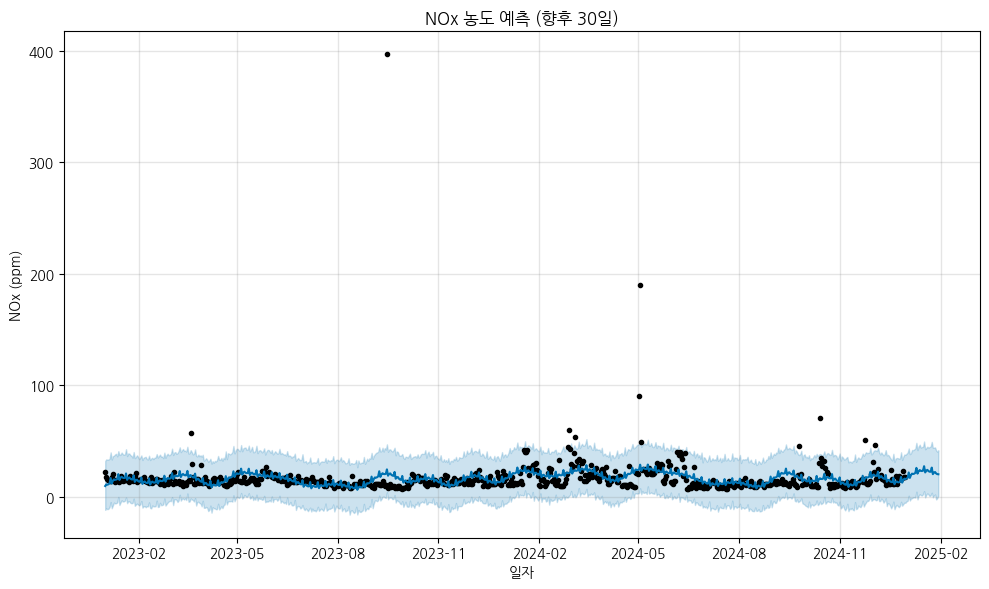

            ds       yhat  yhat_lower  yhat_upper
751 2025-01-21  23.253619    2.262711   44.278390
752 2025-01-22  22.736173    0.895562   44.851266
753 2025-01-23  22.655709    1.550606   45.364207
754 2025-01-24  26.401507    3.855990   49.437946
755 2025-01-25  20.516801   -0.216620   44.131254
756 2025-01-26  22.005201    1.298451   44.244171
757 2025-01-27  22.415549    2.300669   44.520574
758 2025-01-28  21.164834   -2.201981   41.851236
759 2025-01-29  20.553258   -1.044683   40.687706
760 2025-01-30  20.421869    1.145162   41.978462


In [16]:
from prophet import Prophet

# 1. CSV 파일 로드
df = pd.read_csv("일평균_한국남동발전_대기오염물질배출농도_변환.csv")  # 파일명에 맞게 수정
df["일자"] = pd.to_datetime(df["일자"])

# 2. 일별 NOx 평균으로 집계
df_daily = df.groupby("일자")["NOX"].mean().reset_index()
df_daily.columns = ["ds", "y"]  # Prophet 형식

# 3. 모델 정의 및 학습
model = Prophet()
model.fit(df_daily)

# 4. 미래 30일 예측
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 5. 시각화
model.plot(forecast)
plt.title("NOx 농도 예측 (향후 30일)")
plt.xlabel("일자")
plt.ylabel("NOx (ppm)")
plt.tight_layout()
plt.show()

# 6. 예측 결과 일부 출력
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))


### XGBoost

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. 필요한 변수 정의
feature_cols = ["산소", "유량", "온도", "먼지"]
target_col = "NOX"

# 2. 사업소, 호기를 범주형 → 수치형 코드로 변환
df_model = df.copy()
df_model["사업소"] = df_model["사업소"].astype("category")
df_model["호기"] = df_model["호기"].astype("category")
df_model["사업소코드"] = df_model["사업소"].cat.codes
df_model["호기코드"] = df_model["호기"].cat.codes

# 3. 최종 feature 목록에 코드 추가
extended_feature_cols = feature_cols + ["사업소코드", "호기코드"]

# 4. 결측치 제거
df_model = df_model.dropna(subset=extended_feature_cols + [target_col])

X = df_model[extended_feature_cols]
y = df_model[target_col]

# 5. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. XGBoost 모델 학습
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 7. 예측
y_pred = model.predict(X_test)

# 8. 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 104.65
R² Score: 0.0254


In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. 기본 설정
feature_cols = ["산소", "유량", "온도", "먼지", "사업소", "호기"]
target_col = "NOX"

# 2. 결측치 제거
df_model = df.copy()
df_model = df_model.dropna(subset=feature_cols + [target_col])

# 3. Label Encoding
label_encoders = {}
for col in ["사업소", "호기"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # 나중에 디코딩하려면 사용

# 4. 입력/타깃 분리
X = df_model[feature_cols]
y = df_model[target_col]

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. 모델 학습
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 8. 출력
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 104.65
R² Score: 0.0254


In [22]:

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 사용할 변수 정의
feature_cols = ["산소", "유량", "온도", "먼지", "사업소", "호기"]
target_col = "NOX"

# 2. 결측치 제거
df_model = df.dropna(subset=feature_cols + [target_col]).copy()

# 3. Label Encoding
le_dict = {}
for col in ["사업소", "호기"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le  # 저장해두면 추후 복원 가능

# 4. 입력 변수 및 타깃 변수 설정
X = df_model[feature_cols]
y = df_model[target_col]

# 5. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. LightGBM 모델 학습
model = LGBMRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 8. 결과 출력
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 15121, number of used features: 6
[LightGBM] [Info] Start training from score 16.493266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### LSTM

In [24]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 3.2 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 4.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. 전처리 대상 변수
feature_cols = ["산소", "유량", "온도", "먼지", "사업소", "호기"]
target_col = "NOX"

# 2. 결측치 제거
df_lstm = df.dropna(subset=feature_cols + [target_col]).copy()

# 3. 날짜 처리 및 정렬
df_lstm["일자"] = pd.to_datetime(df_lstm["일자"])
df_lstm = df_lstm.sort_values("일자")

# 4. 라벨 인코딩
for col in ["사업소", "호기"]:
    le = LabelEncoder()
    df_lstm[col] = le.fit_transform(df_lstm[col])

# 5. 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_lstm[feature_cols + [target_col]])
scaled_df = pd.DataFrame(scaled, columns=feature_cols + [target_col])

# 6. 시퀀스 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # feature 시퀀스
        y.append(data[i+seq_length, -1])     # 다음 시점의 NOX
    return np.array(X), np.array(y)

# 7. 시퀀스 생성
seq_length = 7
X, y = create_sequences(scaled_df.values, seq_length)

# 8. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # 시계열이므로 shuffle=False
)

# 9. LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 10. 학습
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_split=0.1, callbacks=[early_stop], verbose=1)

# 11. 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(np.mean((y_pred.flatten() - y_test) ** 2))
print(f"RMSE: {rmse:.2f}")


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/50


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.8346e-04 - val_loss: 7.6061e-05
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8763e-04 - val_loss: 3.2062e-05
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4756e-04 - val_loss: 4.4752e-05
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3441e-04 - val_loss: 3.4090e-05
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 4.6861e-04 - val_loss: 6.4960e-05
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.9208e-04 - val_loss: 2.8228e-05
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0546e-04 - val_loss: 3.0315e-05
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7224e-04 - val_loss: 2.7358e-05
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 2.3349e-04 - val_loss: 2.7473e-05
Epoch 10/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 2.3566e-04 - val_loss: 3.1878e-05
Epoch 11/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss:

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 예측값은 y_pred (2D), 실제값은 y_test
y_pred_flat = y_pred.flatten()

mae = mean_absolute_error(y_test, y_pred_flat)
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_flat)
mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) * 100

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE:  0.0026
MSE:  0.0001
RMSE: 0.0072
R² Score: 0.0406


/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_6646/1171410704.py:10: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) * 100


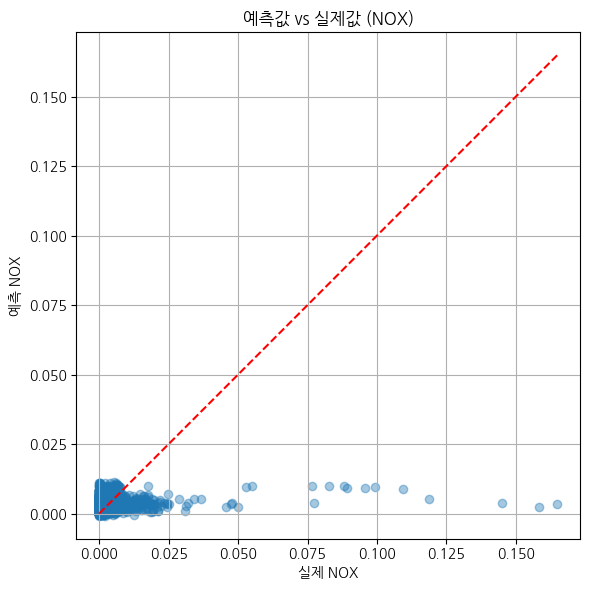

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 NOX")
plt.ylabel("예측 NOX")
plt.title("예측값 vs 실제값 (NOX)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 대부분의 데이터가 왼쪽 하단에 몰려 있음 -> nox값 자체가 매우 낮은 수준
# 점들이 빨간 대각선 아래에 위치 -> 예측값이 실제보다 낮은 경우가 많음
# 빨간 선에 가까운 점이 많을수록 예측이 정확한데, 현재는 상당수가 선 아래에 있음


## ✅ 그래프 구성 요소

* **X축**: 실제 NOX 값
* **Y축**: 모델이 예측한 NOX 값
* **파란 점들**: 각 데이터 포인트 (예: 한 시점의 예측 vs 실제)
* **빨간 점선 (y = x)**: 완벽한 예측선 — 이 선 위에 가까울수록 예측이 정확함

---

## ✅ 그래프 해석

### 🔎 1. 전반적 경향

* 대부분의 데이터가 **왼쪽 하단에 몰려 있음** → NOX 값 자체가 매우 낮은 수준 (예: 0\~0.02)
* **점들이 빨간 대각선 아래에 위치** → 예측값이 실제보다 낮은 경우가 많다는 뜻

### 🔎 2. 예측 정확도

* 빨간 선에 가까운 점이 많을수록 예측이 정확한데, 현재는 **상당수가 선 아래에 있음**
* 이는 모델이 **NOX를 과소평가하는 경향**이 있다는 뜻입니다

### 🔎 3. 이상치

* 실제 NOX 값이 0.1 이상인 경우도 존재하지만, 그 경우에도 예측은 매우 낮음

  * 즉, **높은 NOX에 대해 모델이 잘 대응하지 못함**
  * 고농도 상황에서 **모델 성능이 저하**되고 있음

---

## 📊 해석 요약

| 항목     | 해석                               |
| ------ | -------------------------------- |
| 예측 방향성 | 대체로 맞지만 전체적으로 **과소예측**           |
| 고농도 대응 | 잘 못함 — 예측값이 거의 0에 수렴             |
| 전반 성능  | 낮은 NOX 구간에서는 일부 일치하지만, 정확도는 낮은 편 |

---

## ✅ 개선 제안

1. **로그 변환(Log Scaling)**

   * `NOX` 값이 전반적으로 너무 작을 경우 `log1p`로 변환하면 더 안정적인 학습 가능
2. **데이터 불균형 처리**

   * 고농도 데이터가 너무 적다면 **oversampling, 가중치 부여 등으로 보완**
3. **모델 변경 or 조합**

   * LightGBM, CatBoost, LSTM 등 다른 모델과 비교해보며 고농도 대응력 강화
4. **Residual(오차) 시각화**

   * 예측 오차가 어디서 집중되는지 히스토그램/시계열로 확인



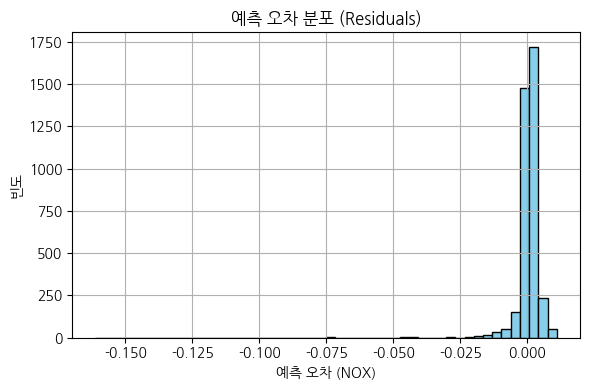

In [30]:
errors = y_pred_flat - y_test

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=50, color="skyblue", edgecolor="black")
plt.title("예측 오차 분포 (Residuals)")
plt.xlabel("예측 오차 (NOX)")
plt.ylabel("빈도")
plt.grid(True)
plt.tight_layout()
plt.show()


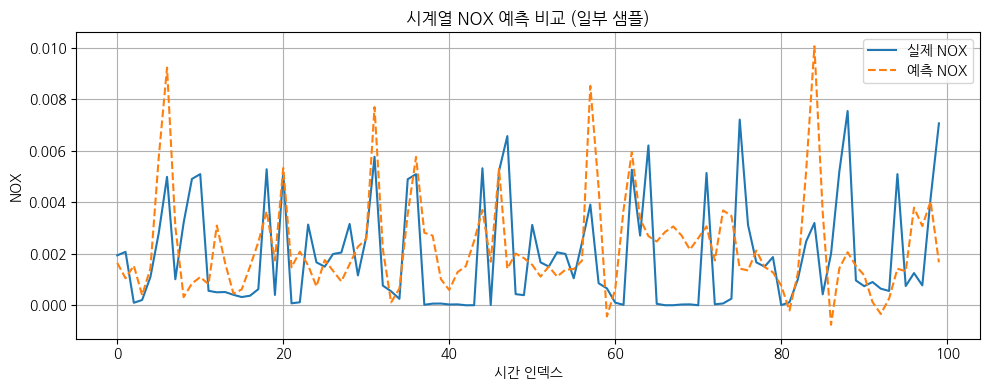

In [32]:
plt.figure(figsize=(10, 4))
# Pandas Series로 변환 없이 바로 시각화 (정렬된 순서로)
plt.plot(range(100), y_test[:100], label="실제 NOX")
plt.plot(range(100), y_pred_flat[:100], label="예측 NOX", linestyle='--')

plt.title("시계열 NOX 예측 비교 (일부 샘플)")
plt.xlabel("시간 인덱스")
plt.ylabel("NOX")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

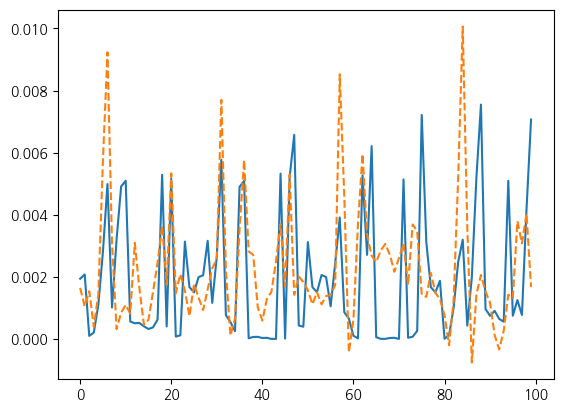

In [33]:
# 인덱스 초기화하고 사용
y_true = pd.Series(y_test[:100]).reset_index(drop=True)
y_pred = pd.Series(y_pred_flat[:100])

plt.plot(y_true, label="실제 NOX")
plt.plot(y_pred, label="예측 NOX", linestyle="--")


### 날씨 데이터 추가

In [34]:
weather_df=pd.read_csv('./기상정보.csv', encoding='cp949'  )
weather_df.head()

,사업소,호기,일자,기온,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2023-01-01,-3.96,46.07,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,-,2023-01-02,-7.45,63.39,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,-,2023-01-03,-7.28,56.97,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,-,2023-01-04,-5.12,68.63,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.50,NaN,NaN
4,분당,-,2023-01-05,-4.20,72.47,324.25,1.42,NaN,NaN,-4.20,72.47,324.25,1.42,NaN,NaN


In [35]:
weather_df.shape

(3341, 15)

In [36]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     3341 non-null   object 
 1   호기      2731 non-null   object 
 2   일자      3341 non-null   object 
 3   기온      3340 non-null   float64
 4   습도      3340 non-null   float64
 5   풍향      3340 non-null   float64
 6   풍속      3337 non-null   float64
 7   강수량     2598 non-null   float64
 8   기압      1399 non-null   float64
 9   대기안정도   2609 non-null   float64
 10  증발량     2609 non-null   float64
 11  일조시간    2609 non-null   float64
 12  전일강수량   2609 non-null   float64
 13  60분강수량  1869 non-null   float64
 14  금일강수량   1397 non-null   float64
dtypes: float64(12), object(3)
memory usage: 391.6+ KB


In [37]:
weather_df.isna().sum()

사업소          0
호기         610
일자           0
기온           1
습도           1
풍향           1
풍속           4
강수량        743
기압        1942
대기안정도      732
증발량        732
일조시간       732
전일강수량      732
60분강수량    1472
금일강수량     1944
dtype: int64

In [38]:
weather_df.describe()

,기온,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
count,3340.000000,3340.000000,3340.000000,3337.000000,2598.000000,1399.000000,2609.000000,2609.000000,2609.000000,2609.000000,1869.000000,1397.000000
mean,12.980378,72.872411,209.976764,2.593972,3.293245,1010.058017,12.067559,74.035650,214.740856,2.329622,2.283494,487.618346
std,9.591118,18.928681,101.453193,1.883172,15.354607,8.033832,9.607689,19.393327,102.960915,1.810390,11.305376,503.719487
min,-16.220000,17.910000,0.000000,0.010000,0.000000,984.183333,-16.220000,17.910000,0.000000,0.010000,0.000000,0.000000
25%,5.284500,58.484000,126.250500,1.390000,0.000000,1003.960417,4.226000,59.383333,126.890000,1.172000,0.000000,0.000000
50%,13.580000,75.115000,229.430000,2.300000,0.000000,1010.230000,12.870000,76.920000,231.250000,2.240000,0.000000,46.500000
75%,21.200000,89.132500,298.397000,3.100000,0.000000,1015.895000,20.406000,90.990000,330.020000,2.650000,0.000000,1013.300000
max,32.100000,100.000000,358.900000,19.650000,328.000000,1031.710000,31.810000,100.000000,347.330000,19.650000,316.000000,1031.710000


In [39]:
weather_df.describe(include='O')

,사업소,호기,일자
count,3341,2731,3341
unique,5,1,731
top,여수,-,2023-01-01
freq,731,2731,5


In [41]:
weather_df['사업소'].value_counts()

사업소
여수     731
분당     728
영동     669
영흥     610
삼천포    603
Name: count, dtype: int64

In [42]:
weather_df.head()

,사업소,호기,일자,기온,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2023-01-01,-3.96,46.07,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,-,2023-01-02,-7.45,63.39,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,-,2023-01-03,-7.28,56.97,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,-,2023-01-04,-5.12,68.63,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.50,NaN,NaN
4,분당,-,2023-01-05,-4.20,72.47,324.25,1.42,NaN,NaN,-4.20,72.47,324.25,1.42,NaN,NaN


In [46]:
weather_df.shape

(3341, 15)

In [45]:
weather_df['호기'].value_counts()

호기
-    2731
Name: count, dtype: int64

In [44]:
weather_df.groupby('사업소')['호기'].value_counts()

사업소  호기
분당   -     728
삼천포  -     603
여수   -     731
영동   -     669
Name: count, dtype: int64

In [43]:
df.head()

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,2024-12-31,0.0,6.76,0.0,15.38,52558.65,124.67
1,분당,2호기,2024-12-31,0.0,3.86,0.0,20.90,82.73,16.32
2,분당,3호기,2024-12-31,0.0,8.07,0.0,15.22,69124.62,123.12
3,분당,4호기,2024-12-31,0.0,3.47,0.0,20.85,109.42,20.09
4,분당,5호기,2024-12-31,0.0,8.09,0.0,15.66,82712.37,108.17


In [52]:
# 날짜 형식 통일
df["일자"] = pd.to_datetime(df["일자"])
weather_df["일자"] = pd.to_datetime(weather_df["일자"])

# 컬럼명 정리
if "사업소명" in weather_df.columns:
    weather_df.rename(columns={"사업소명": "사업소"}, inplace=True)

# 병합 수행
df_merged = pd.merge(df, weather_df, on=["사업소", "일자"], how="left")


In [53]:
df_merged.head()

,사업소,호기_x,일자,SOX,NOX,먼지,산소,유량,온도,호기_y,...,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,1호기,2024-12-31,0.0,6.76,0.0,15.38,52558.65,124.67,-,...,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
1,분당,2호기,2024-12-31,0.0,3.86,0.0,20.90,82.73,16.32,-,...,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
2,분당,3호기,2024-12-31,0.0,8.07,0.0,15.22,69124.62,123.12,-,...,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
3,분당,4호기,2024-12-31,0.0,3.47,0.0,20.85,109.42,20.09,-,...,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
4,분당,5호기,2024-12-31,0.0,8.09,0.0,15.66,82712.37,108.17,-,...,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN


In [54]:
df_merged.isna().sum()

사업소           0
호기_x          0
일자            0
SOX           0
NOX           0
먼지            0
산소            0
유량            0
온도            0
호기_y       5526
기온         1868
습도         1868
풍향         1868
풍속         1874
강수량        7765
기압        16104
대기안정도      3330
증발량        3330
일조시간       3330
전일강수량      3330
60분강수량     9223
금일강수량     16108
dtype: int64

In [55]:
df.shape

(18902, 9)

In [56]:
df_merged.shape

(18902, 22)

In [57]:
df_merged.to_csv('./일별_배출량_날씨_통합_데이터.csv', index=False  )

#### 불필요한 컬럼 삭제

In [59]:
df_merged.drop(columns=["호기_y"],inplace=True)    

In [60]:
df_merged["일자"] = pd.to_datetime(df_merged["일자"])


#### 결측치 삭제 버전

In [61]:
# 3. 결측치 제거: NOX와 주요 입력변수들 기준
required_columns = ["NOX", "산소", "유량", "온도", "기온", "습도", "풍향", "풍속"]
df_clean = df_merged.dropna(subset=required_columns)

# 4. 범주형 변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

le_plant = LabelEncoder()
le_unit = LabelEncoder()

df_clean["사업소_encoded"] = le_plant.fit_transform(df_clean["사업소"])
df_clean["호기_encoded"] = le_unit.fit_transform(df_clean["호기_x"])

# 5. 최종 모델 입력용 변수 구성
feature_cols = ["산소", "유량", "온도", "기온", "습도", "풍향", "풍속", "사업소_encoded", "호기_encoded"]
target_col = "NOX"

X = df_clean[feature_cols]
y = df_clean[target_col]

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_6646/2206322113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["사업소_encoded"] = le_plant.fit_transform(df_clean["사업소"])
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_6646/2206322113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["호기_encoded"] = le_unit.fit_transform(df_clean["호기_x"])


In [62]:
# 7. 시퀀스 생성
seq_length = 7
X, y = create_sequences(scaled_df.values, seq_length)

# 8. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # 시계열이므로 shuffle=False
)

# 9. LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 10. 학습
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_split=0.1, callbacks=[early_stop], verbose=1)

# 11. 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(np.mean((y_pred.flatten() - y_test) ** 2))
print(f"RMSE: {rmse:.2f}")

Epoch 1/50


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.1688e-04 - val_loss: 3.4130e-05
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8501e-04 - val_loss: 4.3481e-05
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 2.6194e-04 - val_loss: 3.4214e-05
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2856e-05 - val_loss: 2.2476e-04
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.3763e-04 - val_loss: 2.8642e-05
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1352e-04 - val_loss: 2.9440e-05
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7136e-04 - val_loss: 6.1745e-05
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8757e-04 - val_loss: 2.8825e-05
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0091e-04 - val_loss: 5.1453e-05
Epoch 10/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.8439e-04 - val_loss: 2.7005e-05
Epoch 11/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1

In [63]:
# 예측값은 y_pred (2D), 실제값은 y_test
y_pred_flat = y_pred.flatten()

mae = mean_absolute_error(y_test, y_pred_flat)
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_flat)
mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) * 100

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE:  0.0025
MSE:  0.0001
RMSE: 0.0071
R² Score: 0.0618


/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_6646/2399744381.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) * 100


In [ ]:
MAE:  0.0026
MSE:  0.0001
RMSE: 0.0072
R² Score: 0.0406